<a href="https://colab.research.google.com/github/areej90/SDAIA-Projects/blob/main/Task_(1)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. Data Cleaning

### Read the dataset

In [2]:
df =pd.read_csv('/content/Task (1) Dataset.csv')

In [3]:
df.shape

(12316, 32)

### Handle Missing Values

In [4]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [5]:
df.duplicated().sum()

0

### Correct any inconsistent data entries.

In [6]:
# using forward fill
df.fillna(method='ffill',inplace=True)

In [7]:
df = df.drop(['Service_year_of_vehicle' , 'Defect_of_vehicle' , 'Work_of_casuality' ,'Fitness_of_casuality' , 'Types_of_Junction' , 'Type_of_vehicle' , 'Lanes_or_Medians','Road_allignment' ,'Vehicle_driver_relation'] , axis=1)

In [8]:
df['Educational_level']=df['Educational_level'].fillna(df['Educational_level'].mode()[0])
df['Driving_experience']=df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])
df['Owner_of_vehicle']=df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])
df['Area_accident_occured']=df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0])

In [9]:
df['Vehicle_movement'].fillna( method ='ffill', inplace = True)

In [10]:
df.dropna(subset=['Road_surface_type'], inplace=True)
df.dropna(subset=['Type_of_collision'], inplace=True)

In [11]:
df = df[df["Casualty_class"].str.contains("na") == False]
df = df[df["Sex_of_casualty"].str.contains("na") == False]
df = df[df["Age_band_of_casualty"].str.contains("na") == False]
df = df[df["Casualty_severity"].str.contains("na") == False]

In [12]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Owner_of_vehicle               0
Area_accident_occured          0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [13]:
df.shape

(7873, 23)

### Ensure data types are appropriate for each column.

---



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7873 entries, 2 to 12315
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         7873 non-null   object
 1   Day_of_week                  7873 non-null   object
 2   Age_band_of_driver           7873 non-null   object
 3   Sex_of_driver                7873 non-null   object
 4   Educational_level            7873 non-null   object
 5   Driving_experience           7873 non-null   object
 6   Owner_of_vehicle             7873 non-null   object
 7   Area_accident_occured        7873 non-null   object
 8   Road_surface_type            7873 non-null   object
 9   Road_surface_conditions      7873 non-null   object
 10  Light_conditions             7873 non-null   object
 11  Weather_conditions           7873 non-null   object
 12  Type_of_collision            7873 non-null   object
 13  Number_of_vehicles_involved  7873 non

In [15]:
df = df.astype({'Casualty_severity': int})

In [16]:
df.to_csv('DataAfterClean.csv')

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [17]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity
count,7873.000000,7873.000000,7873.000000
mean,2.036073,1.558491,2.895466
std,0.679602,1.026412,0.316583
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000
50%,2.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000
max,7.000000,8.000000,3.000000


### Identify and analyze patterns in the data.

In [18]:
grouped_data = df.groupby('Age_band_of_driver')['Accident_severity'].value_counts().unstack()
grouped_data

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Age_band_of_driver,,,
18-30,42,405,2342
31-50,39,337,2184
Over 51,18,157,818
Under 18,8,113,411
Unknown,3,117,879


### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

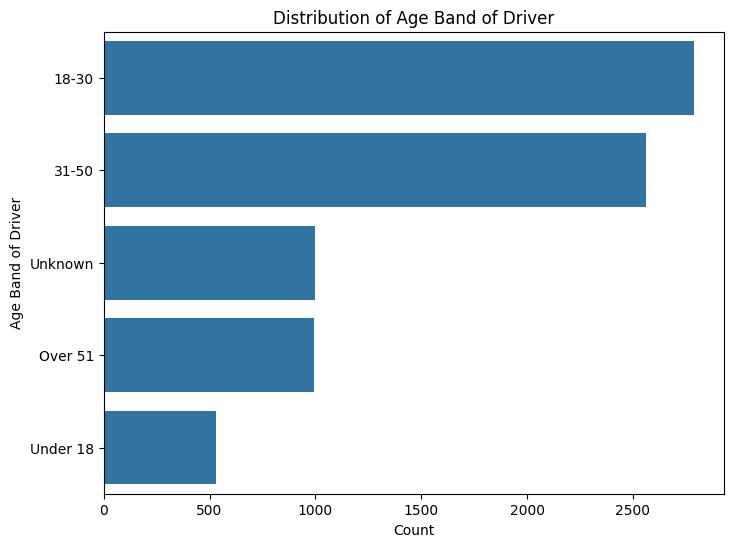

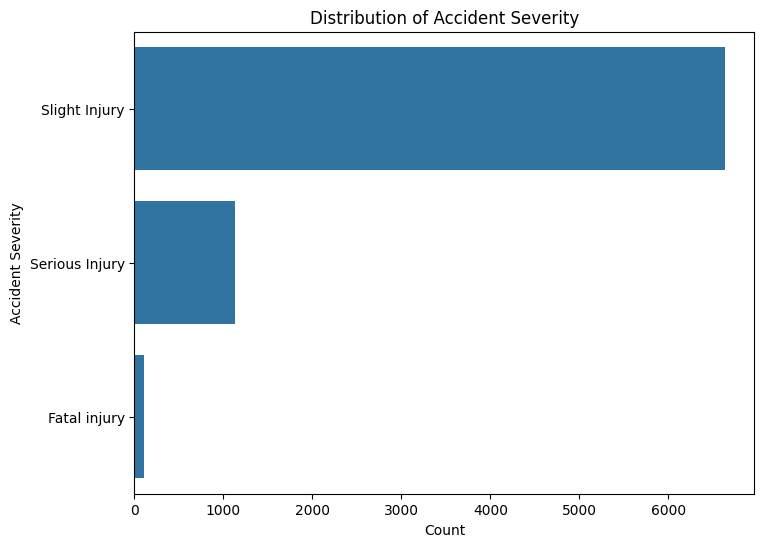

In [24]:
# Distribution of Age_band_of_driver
plt.figure(figsize=(8, 6))
sns.countplot(y='Age_band_of_driver', data=df, order=df['Age_band_of_driver'].value_counts().index)
plt.title('Distribution of Age Band of Driver')
plt.xlabel('Count')
plt.ylabel('Age Band of Driver')
plt.show()

# Distribution of Accident_severity
plt.figure(figsize=(8, 6))
sns.countplot(y='Accident_severity', data=df, order=df['Accident_severity'].value_counts().index)
plt.title('Distribution of Accident Severity')
plt.xlabel('Count')
plt.ylabel('Accident Severity')
plt.show()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


Accident_severity   Fatal injury  Serious Injury  Slight Injury
Age_band_of_driver                                             
18-30                         42             405           2342
31-50                         39             337           2184
Over 51                       18             157            818
Under 18                       8             113            411
Unknown                        3             117            879


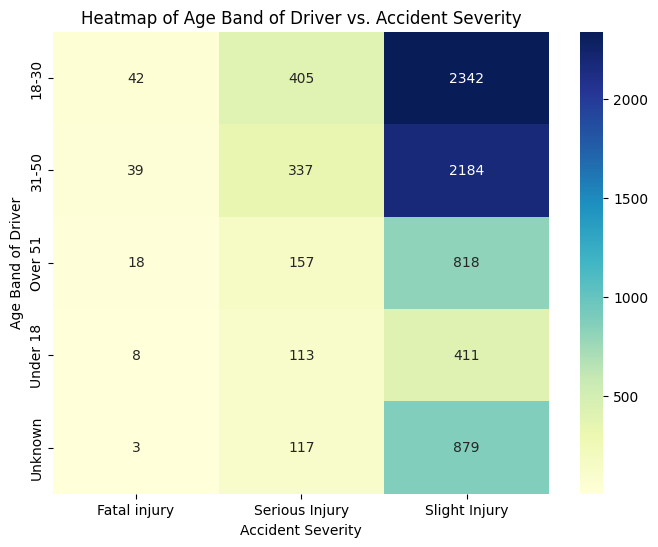

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(df['Age_band_of_driver'], df['Accident_severity'])
print(contingency_table)

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Age Band of Driver vs. Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Age Band of Driver')
plt.show()

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


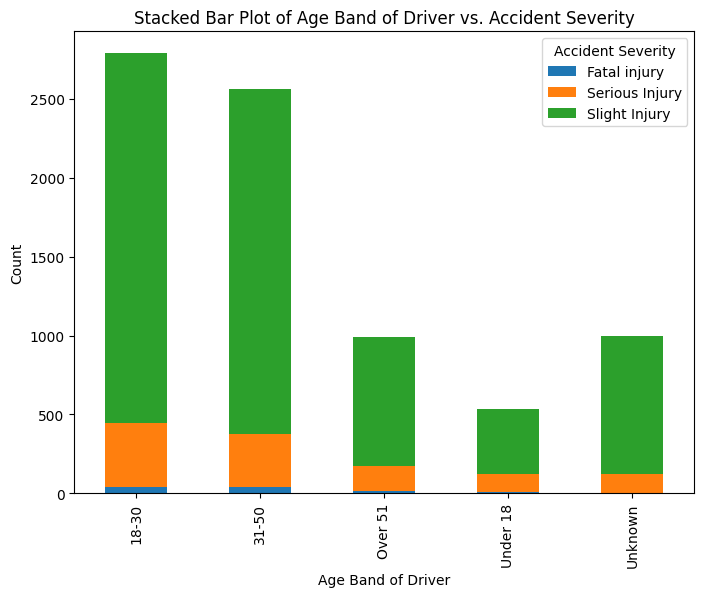

In [26]:
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Plot of Age Band of Driver vs. Accident Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

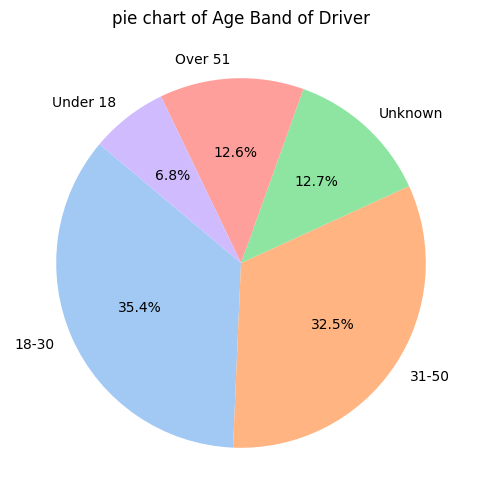

In [27]:
age_band_counts = df['Age_band_of_driver'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_band_counts, labels=age_band_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title('pie chart of Age Band of Driver')
plt.show()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
Are there specific age bands that experience more severe accidents compared to others?

Summary:
Age Band under 18 : Exhibits a lower proportion of severe accidents
Age Band 18 -50 : Shows a higher proportion of severe accidents, suggesting that older drivers may be more prone to severe accidents.


Based on the insights:

  -For Younger Drivers:
      Focus on improving driving skills and risk awareness.

  -For Older Drivers:
      Promote regular health check-ups and driving assessments.